In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://data.sfgov.org/api/views/iqtk-etij/rows.csv?accessType=DOWNLOAD"
resp = requests.get(url)
resp.raise_for_status()    # check for errors
data = StringIO(resp.text)
df = pd.read_csv(data)

print(df.shape)
print(df.head())


(62714, 28)
     Age_group  Sex             Topic         Data_source  \
0  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
1  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
2  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
3  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
4  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   

                        Health_condition-Data_source     Period    Year  \
0  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2019  2019.0   
1  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2020  2020.0   
2  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2021  2021.0   
3  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2022  2022.0   
4  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...  2014-2016     NaN   

   Denominator Denominator_is  Number_with_outcome  ... Race_ethnicity  \
0       8307.0   TOTAL BIRTHS                 25.0  ...            ALL   
1       7890.0   TOTAL

In [ ]:
df

,Age_group,Sex,Topic,Data_source,Health_condition-Data_source,Period,Year,Denominator,Denominator_is,Number_with_outcome,...,Race_ethnicity,Rate_title,Trend_title,Filter_1000_or_more,Sort_1000_or_more,Primary_Neighborhood,Cause of death rank,Death_tooltip,Latest_data,Unique_row_id
0,0to12months,ALL,HEALTH CONDITION,CDPH BIRTH RECORDS,ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...,2019,2019.0,8307.0,TOTAL BIRTHS,25.0,...,ALL,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,20-50,4,All,NaN,NaN,NaN,5577
1,0to12months,ALL,HEALTH CONDITION,CDPH BIRTH RECORDS,ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...,2020,2020.0,7890.0,TOTAL BIRTHS,43.0,...,ALL,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,20-50,4,All,NaN,NaN,NaN,19728
2,0to12months,ALL,HEALTH CONDITION,CDPH BIRTH RECORDS,ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...,2021,2021.0,7413.0,TOTAL BIRTHS,46.0,...,ALL,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,20-50,4,All,NaN,NaN,NaN,21267
3,0to12months,ALL,HEALTH CONDITION,CDPH BIRTH RECORDS,ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...,2022,2022.0,7049.0,TOTAL BIRTHS,24.0,...,ALL,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,20-50,4,All,NaN,NaN,NaN,4433
4,0to12months,ALL,HEALTH CONDITION,CDPH BIRTH RECORDS,ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...,2014-2016,NaN,6673.0,TOTAL BIRTHS,21.0,...,ALL,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,Rate of ASSISTED VENTILATION FOR >6 HOURS - CD...,20-50,4,All,NaN,NaN,NaN,437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62709,PREGNANT,FEMALE,HEALTH CONDITION,HOSPITAL ADMISSIONS,URINARY TRACT INFECTION - HOSPITAL ADMISSIONS,2017-2021,NaN,40483.0,NUMBER OF SF BIRTHS,177.0,...,ALL,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,100-499,6,All,NaN,NaN,NaN,44537
62710,PREGNANT,FEMALE,HEALTH CONDITION,HOSPITAL ADMISSIONS,URINARY TRACT INFECTION - HOSPITAL ADMISSIONS,2020-2021,NaN,2559.0,NUMBER OF SF BIRTHS,24.0,...,HISPANIC OR LATINO/A,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,20-50,4,All,NaN,NaN,NaN,5403
62711,PREGNANT,FEMALE,HEALTH CONDITION,HOSPITAL ADMISSIONS,URINARY TRACT INFECTION - HOSPITAL ADMISSIONS,2020-2021,NaN,3158.0,NUMBER OF SF BIRTHS,39.0,...,ALL,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,20-50,4,All,NaN,NaN,NaN,17930
62712,PREGNANT,FEMALE,HEALTH CONDITION,HOSPITAL ADMISSIONS,URINARY TRACT INFECTION - HOSPITAL ADMISSIONS,2020-2021,NaN,15097.0,NUMBER OF SF BIRTHS,58.0,...,ALL,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,Rate of URINARY TRACT INFECTION - HOSPITAL ADM...,51-99,5,All,NaN,NaN,NaN,26645


In [ ]:
#missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age_group                           1
Sex                                 0
Topic                               1
Data_source                         0
Health_condition-Data_source        1
Period                              1
Year                            30635
Denominator                       188
Denominator_is                    120
Number_with_outcome               119
Numerator_is                       15
Rate_95CI                         148
Rate_SF_pop                       148
CI_low                            209
CI_high                           209
Rate_is                           124
Insurance                           1
Zip_code                            1
Race_ethnicity                      1
Rate_title                          1
Trend_title                        24
Filter_1000_or_more                 0
Sort_1000_or_more                   0
Primary_Neighborhood               10
Cause of death rank             62676
Death_tooltip                   6

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1164486689.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1164486689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
missing_values_after_cleaning = df.isnull().sum()
print("Missing Values:\n", missing_values_after_cleaning)

Missing Values:
 Age_group                       0
Sex                             0
Topic                           0
Data_source                     0
Health_condition-Data_source    0
Period                          0
Year                            0
Denominator                     0
Denominator_is                  0
Number_with_outcome             0
Numerator_is                    0
Rate_95CI                       0
Rate_SF_pop                     0
CI_low                          0
CI_high                         0
Rate_is                         0
Insurance                       0
Zip_code                        0
Race_ethnicity                  0
Rate_title                      0
Trend_title                     0
Filter_1000_or_more             0
Sort_1000_or_more               0
Primary_Neighborhood            0
Cause of death rank             0
Death_tooltip                   0
Latest_data                     0
Unique_row_id                   0
dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Year' in numerical_cols:
    numerical_cols.remove('Year')
    categorical_cols.append('Year')

column_data = {
    'Categorical Columns': pd.Series(categorical_cols),
    'Numerical Columns': pd.Series(numerical_cols)
}
column_table = pd.DataFrame(column_data)
display(column_table)

,Categorical Columns,Numerical Columns
0,Age_group,Denominator
1,Sex,Number_with_outcome
2,Topic,Rate_SF_pop
3,Data_source,CI_low
4,Health_condition-Data_source,CI_high
5,Period,Sort_1000_or_more
6,Denominator_is,Cause of death rank
7,Numerator_is,Latest_data
8,Rate_95CI,Unique_row_id
9,Rate_is,NaN


In [ ]:
print(column_table.iloc[:, :1])

             Categorical Columns
0                      Age_group
1                            Sex
2                          Topic
3                    Data_source
4   Health_condition-Data_source
5                         Period
6                 Denominator_is
7                   Numerator_is
8                      Rate_95CI
9                        Rate_is
10                     Insurance
11                      Zip_code
12                Race_ethnicity
13                    Rate_title
14                   Trend_title
15           Filter_1000_or_more
16          Primary_Neighborhood
17                 Death_tooltip
18                          Year


In [ ]:
#Detecting outliers using IQR method
import pandas as pd

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))
outlier_count = outlier_mask.sum()
print("\nOutliers detected per column:\n", outlier_count)

df_clean = df[~outlier_mask.any(axis=1)]

print("\nBefore Cleaning:", df.shape)
print("After Cleaning:", df_clean.shape)

removed_pct = round((1 - len(df_clean) / len(df)) * 100, 2)
print(f"\nPercentage of rows removed: {removed_pct}%")


Outliers detected per column:
 Denominator            8392
Number_with_outcome    8475
Rate_SF_pop            6530
CI_low                 7377
CI_high                5584
Sort_1000_or_more         8
Cause of death rank      30
Latest_data               0
Unique_row_id             0
dtype: int64

Before Cleaning: (62714, 28)
After Cleaning: (43742, 28)

Percentage of rows removed: 30.25%


In [ ]:
df_clean.head()
df=df_clean

In [ ]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()

/tmp/ipython-input-3221108492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-3221108492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
/tmp/ipython-input-3221108492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Age_group,Sex,Topic,Data_source,Health_condition-Data_source,Period,Year,Denominator,Denominator_is,Number_with_outcome,...,Race_ethnicity,Rate_title,Trend_title,Filter_1000_or_more,Sort_1000_or_more,Primary_Neighborhood,Cause of death rank,Death_tooltip,Latest_data,Unique_row_id
0,0,0,5,0,32,43,22,8307.0,18,25.0,...,0,1099,210,3,4,1,3.0,1,1.0,5577
1,0,0,5,0,32,47,23,7890.0,18,43.0,...,0,1100,210,3,4,1,3.0,1,1.0,19728
2,0,0,5,0,32,50,24,7413.0,18,46.0,...,0,1102,210,3,4,1,3.0,1,1.0,21267
3,0,0,5,0,32,52,25,7049.0,18,24.0,...,0,1103,210,3,4,1,3.0,1,1.0,4433
4,0,0,5,0,32,27,22,6673.0,18,21.0,...,0,1097,210,3,4,1,3.0,1,1.0,437


In [ ]:
# Standardizing numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_scaled.head()

,Age_group,Sex,Topic,Data_source,Health_condition-Data_source,Period,Year,Denominator,Denominator_is,Number_with_outcome,...,Race_ethnicity,Rate_title,Trend_title,Filter_1000_or_more,Sort_1000_or_more,Primary_Neighborhood,Cause of death rank,Death_tooltip,Latest_data,Unique_row_id
0,0,0,5,0,32,43,22,-0.198251,18,-0.704734,...,0,1099,210,3,-0.912877,1,0.0,1,0.0,-1.283738
1,0,0,5,0,32,47,23,-0.227846,18,-0.510436,...,0,1100,210,3,-0.912877,1,0.0,1,0.0,-0.354644
2,0,0,5,0,32,50,24,-0.261700,18,-0.478053,...,0,1102,210,3,-0.912877,1,0.0,1,0.0,-0.253600
3,0,0,5,0,32,52,25,-0.287534,18,-0.715529,...,0,1103,210,3,-0.912877,1,0.0,1,0.0,-1.358848
4,0,0,5,0,32,27,22,-0.314219,18,-0.747912,...,0,1097,210,3,-0.912877,1,0.0,1,0.0,-1.621209


In [ ]:
df=df_scaled

In [ ]:
#Summary Statistics
summary_stats = df_scaled[numerical_cols].describe().T
summary_stats['skewness'] = df_scaled[numerical_cols].skew()
summary_stats['kurtosis'] = df_scaled[numerical_cols].kurt()
summary_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Denominator,43742.0,5.198063e-18,1.000011,-0.785760,-0.717130,-0.416349,0.337236,3.715804,1.682854,2.281773
Number_with_outcome,43742.0,-9.746368e-17,1.000011,-0.823472,-0.639968,-0.402493,0.180401,4.400986,2.123292,4.375858
Rate_SF_pop,43742.0,-6.497579e-17,1.000011,-0.861403,-0.702156,-0.419049,0.312310,3.744977,1.616501,1.852440
CI_low,43742.0,-3.378741e-17,1.000011,-0.831930,-0.687867,-0.421350,0.282758,3.706057,1.708597,2.233492
CI_high,43742.0,5.198063e-17,1.000011,-0.892240,-0.710304,-0.415274,0.337053,3.720067,1.553651,1.641557
Sort_1000_or_more,43742.0,1.416472e-16,1.000011,-4.409263,-0.912877,0.252585,1.418047,3.748972,0.277489,-0.833460
Cause of death rank,43742.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Latest_data,43742.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Unique_row_id,43742.0,-7.407240e-17,1.000011,-1.649309,-0.863837,-0.046686,0.826339,2.467634,0.137556,-1.123286


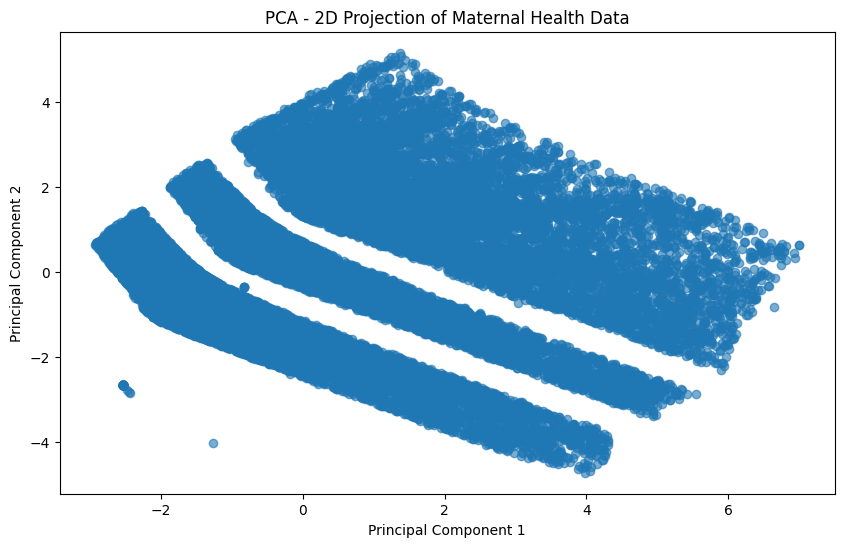

Explained Variance Ratio: [0.53833256 0.32160981]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled[numerical_cols])

plt.figure(figsize=(10,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.6)
plt.title("PCA - 2D Projection of Maternal Health Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [ ]:
# Separate target variable
target = df_scaled['Rate_SF_pop']  # This is your outcome variable
features = df_scaled.drop(columns=['Rate_SF_pop'])

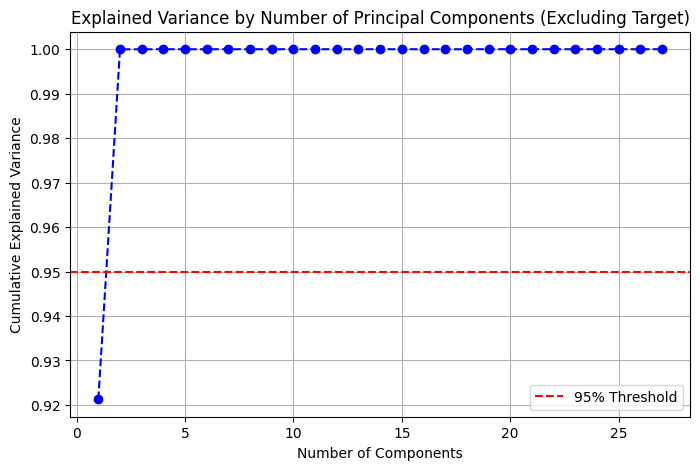

Number of components explaining 95% variance: 2


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on all numerical features except the target
pca_full = PCA()
pca_full.fit(features)

# Explained variance ratio
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', color='b')
plt.title("Explained Variance by Number of Principal Components (Excluding Target)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()

# Choose the number of components that explain 95% variance
n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components_95}")


In [ ]:
# Apply PCA
pca = PCA(n_components=n_components_95)
reduced_features = pca.fit_transform(features)

# Convert to DataFrame
pca_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(n_components_95)])

# Add back the target variable
pca_df['Rate_SF_pop'] = target.reset_index(drop=True)

print("PCA-reduced dataset shape (with target added back):", pca_df.shape)
display(pca_df.head())


PCA-reduced dataset shape (with target added back): (43742, 3)


,PC1,PC2,Rate_SF_pop
0,-9408.434417,-2313.023056,-0.849607
1,-9393.432353,-2312.081682,-0.837811
2,-9387.427867,-2310.136918,-0.831913
3,-9407.425643,-2309.109188,-0.849607
4,-9408.438177,-2314.973509,-0.849607


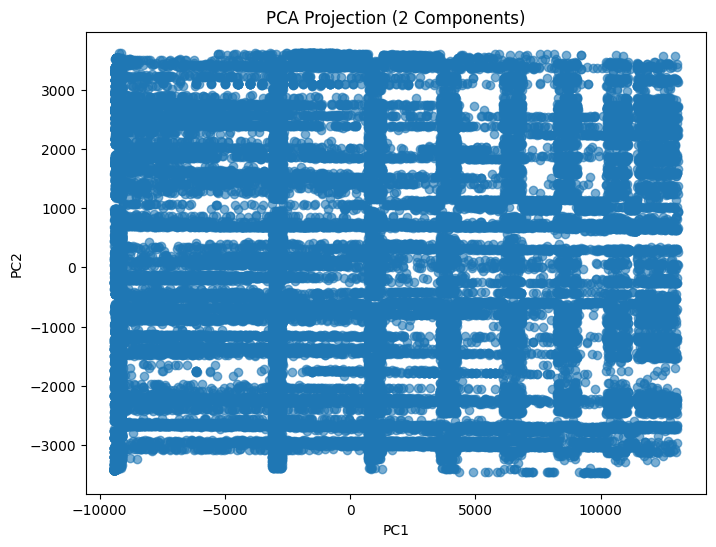

In [ ]:
if n_components_95 == 2:
    plt.figure(figsize=(8,6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
    plt.title("PCA Projection (2 Components)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

elif n_components_95 >= 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.6)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title("PCA Projection (3 Components)")
    plt.show()

In [ ]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43742 entries, 0 to 43741
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          43742 non-null  float64
 1   PC2          43742 non-null  float64
 2   Rate_SF_pop  43742 non-null  float64
dtypes: float64(3)
memory usage: 1.0 MB
